In [1]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


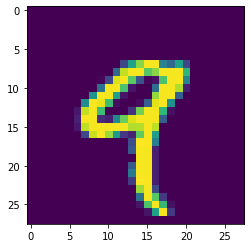

Label of this image is 9


In [3]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [7]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [0]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [0]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [0]:
#importing the model
from keras.models import Sequential

In [0]:
#creating model object
model=Sequential()

In [0]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [0]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [0]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.1528 - acc: 0.9534 - val_loss: 0.0411 - val_acc: 0.9865
Epoch 2/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.0429 - acc: 0.9869 - val_loss: 0.0308 - val_acc: 0.9898
Epoch 3/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.0308 - acc: 0.9903 - val_loss: 0.0294 - val_acc: 0.9910
Epoch 4/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.0218 - acc: 0.9929 - val_loss: 0.0288 - val_acc: 0.9909
Epoch 5/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.0160 - acc: 0.9949 - val_loss: 0.0288 - val_acc: 0.9912


In [16]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

10000/10000 [==============================] - 1s 109us/step


([0.010291422149978097, 0.9966], [0.02878557628018607, 0.9912])